<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-первичны-обзор-данных" data-toc-modified-id="Загрузка-и-первичны-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и первичны обзор данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-настройка-графиков" data-toc-modified-id="Импорт-библиотек-и-настройка-графиков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и настройка графиков</a></span></li><li><span><a href="#Используемые-функции" data-toc-modified-id="Используемые-функции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Используемые функции</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li></ul></li><li><span><a href="#Раздел.-Предобработка-данных" data-toc-modified-id="Раздел.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Раздел. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-пропуски-в-данных" data-toc-modified-id="Проверка-на-пропуски-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка на пропуски в данных</a></span></li><li><span><a href="#Проверка-на-наличие-ошибок-и-дубликатов-в-данных" data-toc-modified-id="Проверка-на-наличие-ошибок-и-дубликатов-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на наличие ошибок и дубликатов в данных</a></span></li></ul></li></ul></div>

# ПРОЕКТ. "Разработка модели мэтчинга товаров для онлайн маркетплейса"

**ПОСТАНОВКА ЗАДАЧИ**

**Заказчик исследования** — Онлайн маркетплейс, предлагающий широкий ассортимент товаров от различных продавцов.

**Исходные данные:** Датасеты содержат индексы товаров, обезличенные признаки товаров и индексы наиболее подходящих товаров-аналогов. Доступны обучающий, валидационный датасет и полный датасет (base) со всеми товарами.

**Цель исследования:** Разработать и обучить модель, способную точно и эффективно находить наиболее подходящие товары-аналоги для заданного товара, используя доступные датасеты.

Основываясь на результатах моделирования, HR-департамент сможет эффективнее управлять персоналом, предотвращая потери и улучшая условия работы.

**Задачи исследования:**
- Провести анализ данных (EDA) для понимания структуры и свойств датасета.
- Разработать и обучить модель мэтчинга товаров, используя state-of-the-art инструменты.
- Оценить производительность модели с использованием метрики accuracy@n.
- - Оптимизировать модель для достижения accuracy@5 ≥ 0.7.
Провести эксперименты по улучшению метрики, рассматривая альтернативные методы подбора аналогов.

**Ход исследования** Исследование будет включать в себя следующие этапы:


1. **Обзор данных:**
   - Загрузка и первичный анализ предоставленных файлов данных.
   - Оценка качества данных и выявление потенциальных проблем.
   
   
2. **Предобработка данных:**
   - Исправление обнаруженных ошибок и пропусков.
   - Поиск аномалий в распределениях.   
   
3. **Исследовательский анализ данных (EDA):**
    - Распределение значений в столбцах.
    - Полезность столбцов для модели.
    - Корреляции между столбцами.
   
   
4. **Подготовка данных для моделирования:**
   - Необходимость масштабирования данных..
   
   
5. **Построение и оценка моделей машинного обучения:**
   - Использование библиотеки FAISS для поиска ближайших соседей.
   - Подбор гиперпараметров и оценка качества моделей.
   
   
6. **Анализ результатов и выработка рекомендаций:**
   - Запуск расчета метрики на наилучших параметрах на полной выборке.
   - Интерпретация результатов прогнозирования.   


7. **Улучшение метрики:**
   - Исследовать возможности улучшения метрики, например, путем поиска большего числа ближайших соседей и последующего отбора.
   
   
8. **Итоговые выводы и рекомендации:**
   - Формулирование ключевых выводов исследования.


Исследование предоставит для маркетплейса инструмент мэтчинга товаров, что способствует росту качетсва предоставляемых услуг для конечного потребителя.

## Загрузка и первичны обзор данных

### Импорт библиотек и настройка графиков

1. Импортируем библиотеки pandas, numpy, matplotlib, seaborn, faiss, sklearn, shap, catboost и другие. 

2. Для решения задачи cчитаем данные из csv-файлов и сохраним в переменные `df_base, df_tain, df_valid и df_valid_answer`

4. В качестве разделителя в файлt используется знак `запятая`. В качестве разделителя десятичной части укажем `точку` методом `decimal='.'`

In [27]:
# Импорт из стандартной библиотеки
import os
import pandas as pd
import numpy as np

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Дополнительные библиотеки для анализа данных
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# Модели машинного обучения
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import faiss
from catboost import CatBoostClassifier, Pool

import joblib
from joblib import dump, load

# Настройка отображения графиков
%matplotlib inline
sns.set(
    font_scale=1.3,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)
shap.initjs()

# Установка опции отображения широких датафреймов
pd.set_option('display.max_colwidth', None)

# Константы
LINE_1 = '-'*125
LINE_2 = '_'*125
RANDOM_STATE = 42
TEST_SIZE = 0.25
NSAMPLES = 3

### Используемые функции

In [9]:
# Функция для загрузки данных
def load_data(file_path, sep=';', decimal=','):
    try:
        os.path.exists(file_path)
        print(f'Загрузка данных из локального файла: {file_path}')
        return pd.read_csv(file_path, sep=sep, decimal=decimal)
    except Exception as e:
        # Если возникла ошибка, выводим сообщение об ошибке
        print('Загрузка произошла с ошибкой')
        error_message = str(e)

In [32]:
# Функция для визуализации гистограмм и выбросов
def visualize_histograms(df, bins=50, lower_quantile=0.01, upper_quantile=0.99, n_cols=5):
    # Удалим столбец 'id' из DataFrame, если он присутствует
    if 'id' in df.columns:
        df_drop_id = df.drop('id', axis=1)
    else:
        df_drop_id = df.copy()  # Копируем DataFrame, чтобы не изменять оригинальный

    # Определяем количественные столбцы
    numeric_columns = df_drop_id.select_dtypes(include=[np.number]).columns
    
    # Проверяем, есть ли количественные данные
    if not numeric_columns.empty:
        n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Вычисляем необходимое количество строк

        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 5))
        axes = axes.flatten()

        for i, column in enumerate(numeric_columns):
            df_drop_id[column].hist(bins=bins, ax=axes[i])
            
            # Вычисление квантилей и выбросов
            lower_quantile_value = df_drop_id[column].quantile(lower_quantile)
            upper_quantile_value = df_drop_id[column].quantile(upper_quantile)
            outliers = df_drop_id[(df_drop_id[column] < lower_quantile_value) | (df_drop_id[column] > upper_quantile_value)]
            outliers_percentage = len(outliers) / len(df_drop_id) * 100
            
            axes[i].set_title(f'{column}\nВыбросы: {outliers_percentage:.2f}%', fontsize=14)
            axes[i].set_xlabel('Значения', fontsize=12)
            axes[i].set_ylabel('Частота', fontsize=12)

            """
            # Вывод информации о квантилях и выбросах
            print(f'{column}:')
            print(f'  Нижний квантиль ({lower_quantile*100}%): {lower_quantile_value}')
            print(f'  Верхний квантиль ({upper_quantile*100}%): {upper_quantile_value}')
            print(f'  Количество выбросов: {len(outliers)}')
            print(f'  Процент выбросов: {outliers_percentage:.2f}%')
            
            axes[i].set_title(f'{column}\nВыбросы: {outliers_percentage:.2f}%', fontsize=14)
            axes[i].set_xlabel('Значения', fontsize=12)
            axes[i].set_ylabel('Частота', fontsize=12)
            """
            
        # Удалить пустые графики, если есть
        for i in range(len(numeric_columns), len(axes)):
            fig.delaxes(axes[i])

        plt.suptitle('Гистограммы признаков', fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print('Нет количественных данных для построения гистограммы.')

### Загрузка данных

In [12]:
%%time

data_paths = [
    'datasets/base.csv', 
    'datasets/train.csv', 
    'datasets/validation.csv', 
    'datasets/validation_answer.csv'
]

# Используем список для хранения загруженных датафреймов
df = []

# Проходим по каждой паре путей в списке
for file_path in data_paths:
    # Для последнего элемента в списке используем значения по умолчанию
    df.append(load_data(file_path, sep=',', decimal='.'))

# Используем словарь для хранения загруженных датафреймов
df_names = ['df_base', 'df_train', 'df_valid', 'df_valid_answer']
df_dict = dict(zip(df_names, df))

Загрузка данных из локального файла: datasets/base.csv
Загрузка данных из локального файла: datasets/train.csv
Загрузка данных из локального файла: datasets/validation.csv
Загрузка данных из локального файла: datasets/validation_answer.csv


Выведем первые 5 строчек DataFrames и общую информацию о них

In [13]:
# Получение первых 5 cтрок датафреймов
for i in range(len(df)):
    print(LINE_2)
    print(f'\n\nПервые 5 строчек датафрейма: {df_names[i]}')
    display(df[i].head())
    print(LINE_1)
    df[i].info()

_____________________________________________________________________________________________________________________________


Первые 5 строчек датафрейма: df_base


,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918139 entries, 0 to 2918138
Data columns (total 73 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   0       float64
 2   1       float64
 3   2       float64
 4   3       float64
 5   4       float64
 6   5       float64
 7   6       float64
 8   7       float64
 9   8       float64
 10  9       float64
 11  10      float64
 12  11      float64
 13  12      float64
 14  13      float64
 15  14      float64
 16  15      float64
 17  16      float64
 18  17      float64
 19  18      float64
 20  19      float64
 21  20      float64
 22  21      float64
 23  22      float64
 24  23      float64
 25  24      float64
 26  25      float64
 27  26      float64
 28  27      float64
 29  28      float64
 30  29      float64
 31  30      float64
 32  31      float64
 33  32      float64
 34  

,Id,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,Target
0,0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,...,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1,1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,...,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2,2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,...,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3,3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,...,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4,4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,...,45.028910,-196.09207,-117.626337,66.926220,42.456170,77.621765,92.479930,-1074.464888,-21.149351,717819-base


-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 74 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      100000 non-null  object 
 1   0       100000 non-null  float64
 2   1       100000 non-null  float64
 3   2       100000 non-null  float64
 4   3       100000 non-null  float64
 5   4       100000 non-null  float64
 6   5       100000 non-null  float64
 7   6       100000 non-null  float64
 8   7       100000 non-null  float64
 9   8       100000 non-null  float64
 10  9       100000 non-null  float64
 11  10      100000 non-null  float64
 12  11      100000 non-null  float64
 13  12      100000 non-null  float64
 14  13      100000 non-null  float64
 15  14      100000 non-null  float64
 16  15      100000 non-null  float64
 17  16      100000 non-null  float64
 18 

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,100000-query,-57.372734,3.597752,-13.213642,-125.92679,110.74594,-81.279594,-461.003172,139.815720,112.880980,...,-75.51302,52.830902,-143.43945,59.051935,69.28224,61.927513,111.59253,115.140656,-1099.130485,-117.079360
1,100001-query,-53.758705,12.790300,-43.268543,-134.41762,114.44991,-90.520130,-759.626065,63.995087,127.117905,...,-79.44183,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.07716,123.391640,-744.442332,-25.009320
2,100002-query,-64.175095,-3.980927,-7.679249,-170.16093,96.44616,-62.377740,-759.626065,87.477554,131.270110,...,-134.79541,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.63641,141.081630,-294.052271,-70.969604
3,100003-query,-99.286860,16.123936,9.837166,-148.06044,83.69708,-133.729720,58.576403,-19.046660,115.042404,...,-77.23611,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.18396,143.252940,-799.363667,-89.392670
4,100004-query,-79.532920,-0.364173,-16.027431,-170.88495,165.45392,-28.291668,33.931936,34.411217,128.903980,...,-123.77025,45.635944,-134.25893,13.735359,70.61763,15.332115,154.56812,101.700640,-1171.892332,-125.307890


-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 73 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      100000 non-null  object 
 1   0       100000 non-null  float64
 2   1       100000 non-null  float64
 3   2       100000 non-null  float64
 4   3       100000 non-null  float64
 5   4       100000 non-null  float64
 6   5       100000 non-null  float64
 7   6       100000 non-null  float64
 8   7       100000 non-null  float64
 9   8       100000 non-null  float64
 10  9       100000 non-null  float64
 11  10      100000 non-null  float64
 12  11      100000 non-null  float64
 13  12      100000 non-null  float64
 14  13      100000 non-null  float64
 15  14      100000 non-null  float64
 16  15      100000 non-null  float64
 17  16      100000 non-null  float64
 18 

,Id,Expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base


-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        100000 non-null  object
 1   Expected  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [39]:
df[3]

,Id,Expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base
...,...,...
99995,199995-query,967418-base
99996,199996-query,1344948-base
99997,199997-query,1690782-base
99998,199998-query,341779-base


**Согласно документации к данным `df_base` мы имеем 73 столбцов:**
- *`id`* — уникальный идентификатор товара.
- *`0 ... 71`* — порядковый номер параметров.

**Согласно документации к данным `df_train` мы имеем 74 столбцов:**
- *`id`* — уникальный идентификатор товара.
- *`0 ... 71`* — порядковый номер параметров.
- *`Target`* — уникальный идентификатор схожего товара (таргет).

**Согласно документации к данным `df_valid` мы имеем 73 столбцов:**
- *`id`* — уникальный идентификатор товара.
- *`0 ... 71`* — порядковый номер параметров.

**Согласно документации к данным `df_valid_answer` мы имеем 2 столбцов:**
- *`id`* — уникальный идентификатор запроса.
- *`Expected`* — уникальный идентификатор ожидаемого товара.

_____________________________________________________________________________________________________________________________

Гистограммы Признаков: df_base


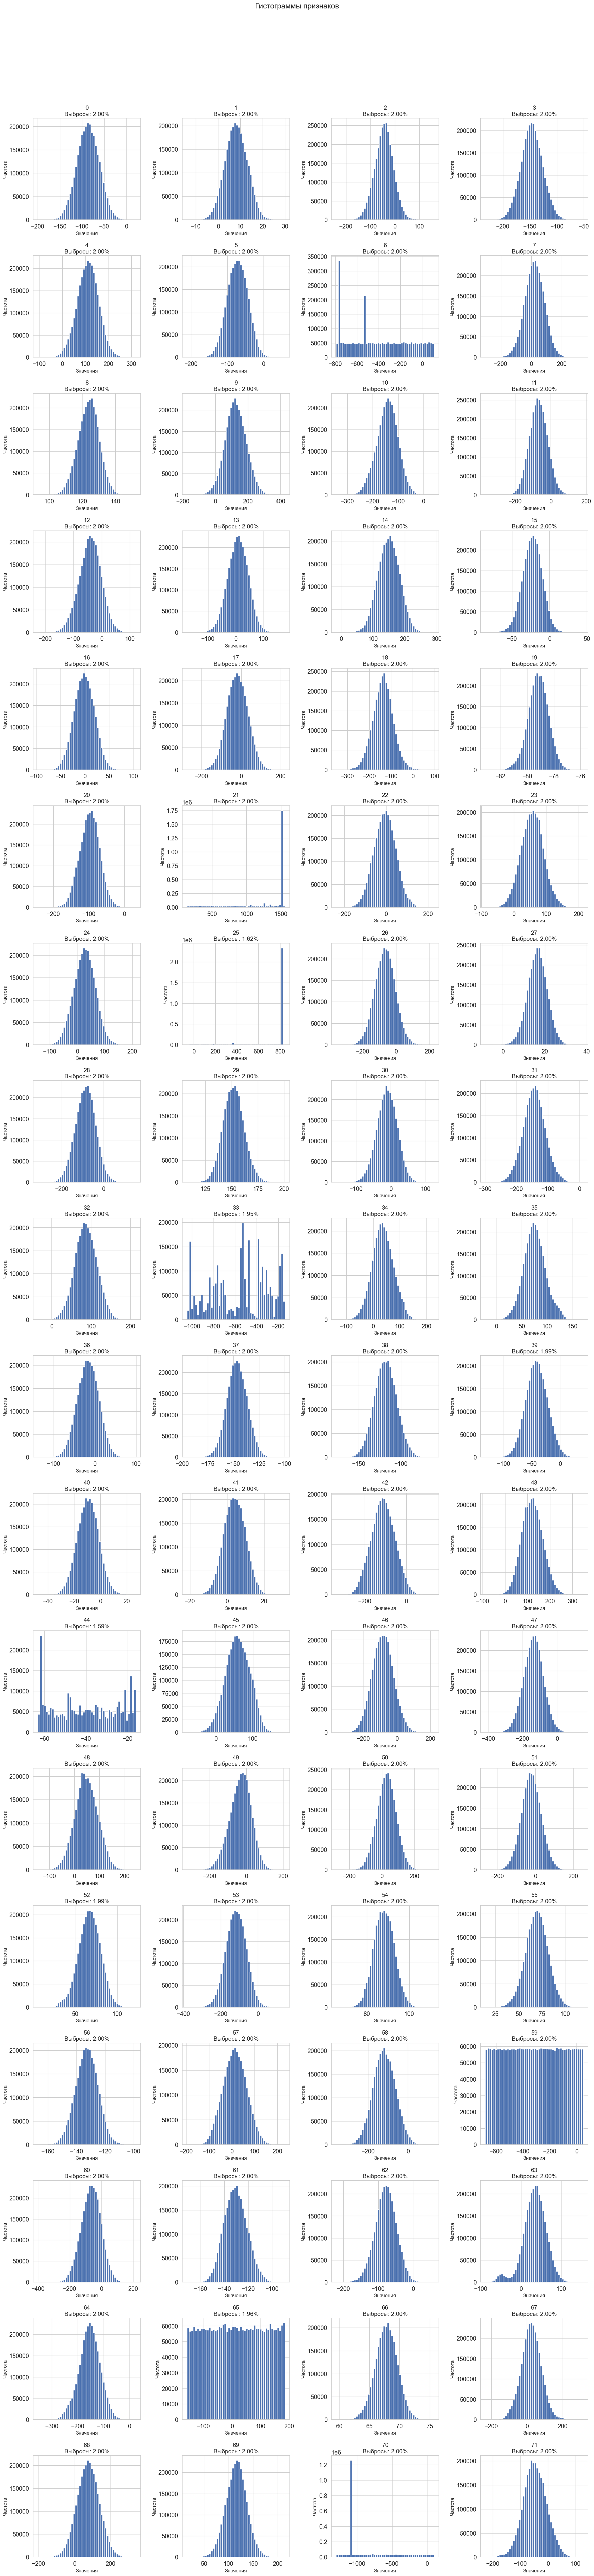

_____________________________________________________________________________________________________________________________

Гистограммы Признаков: df_train


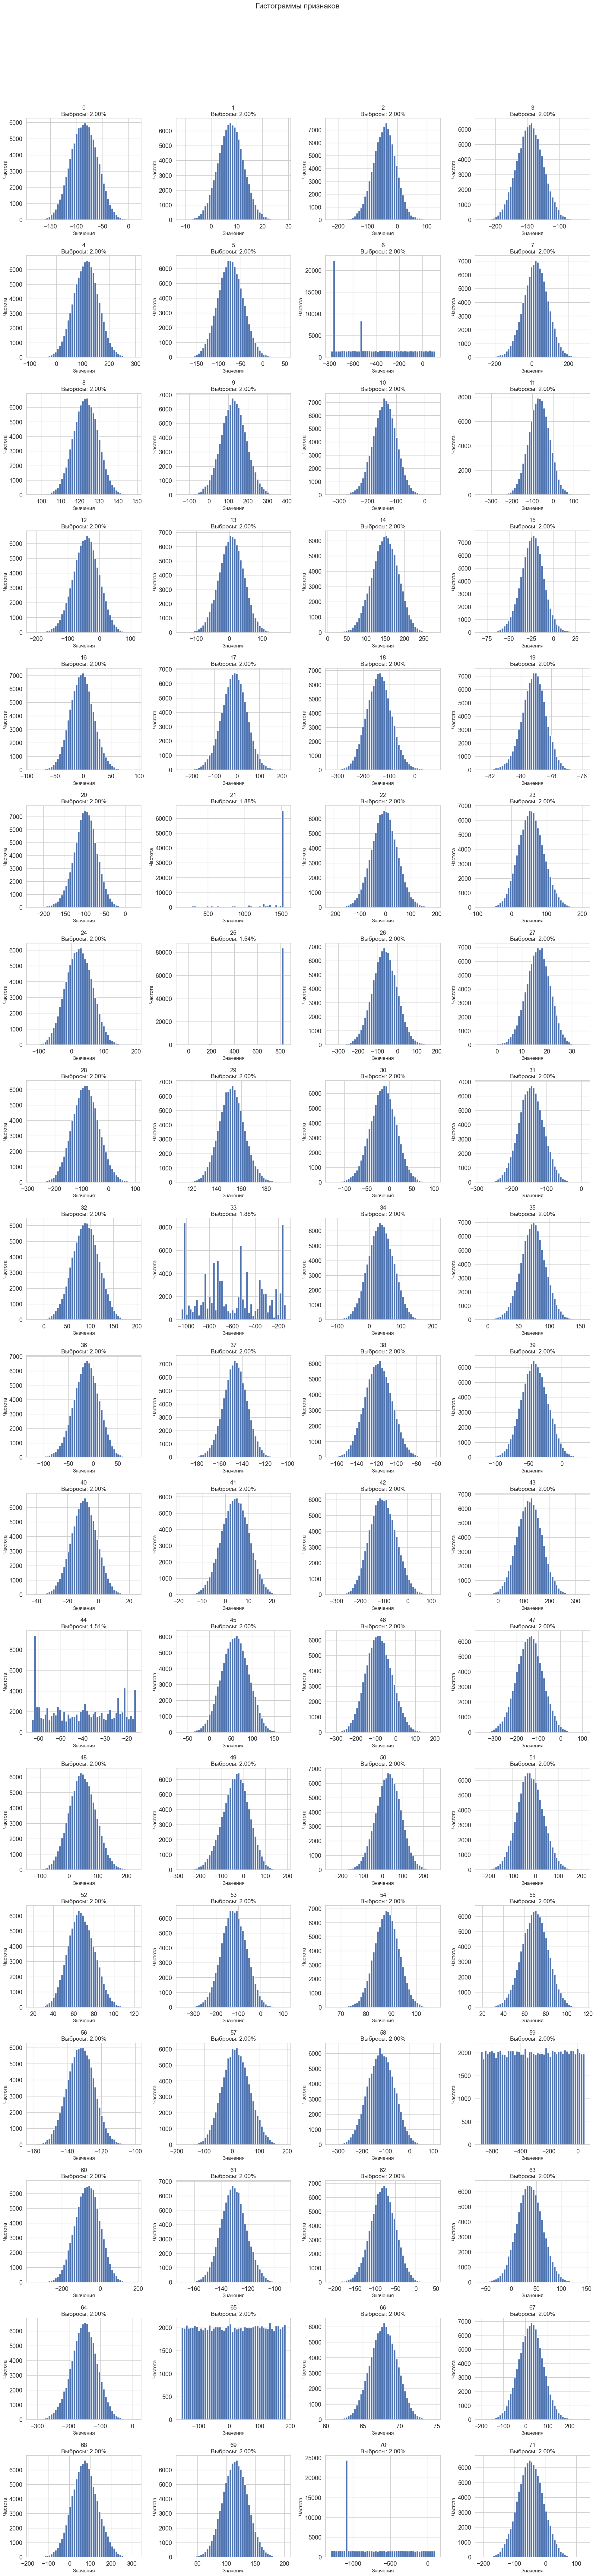

_____________________________________________________________________________________________________________________________

Гистограммы Признаков: df_valid


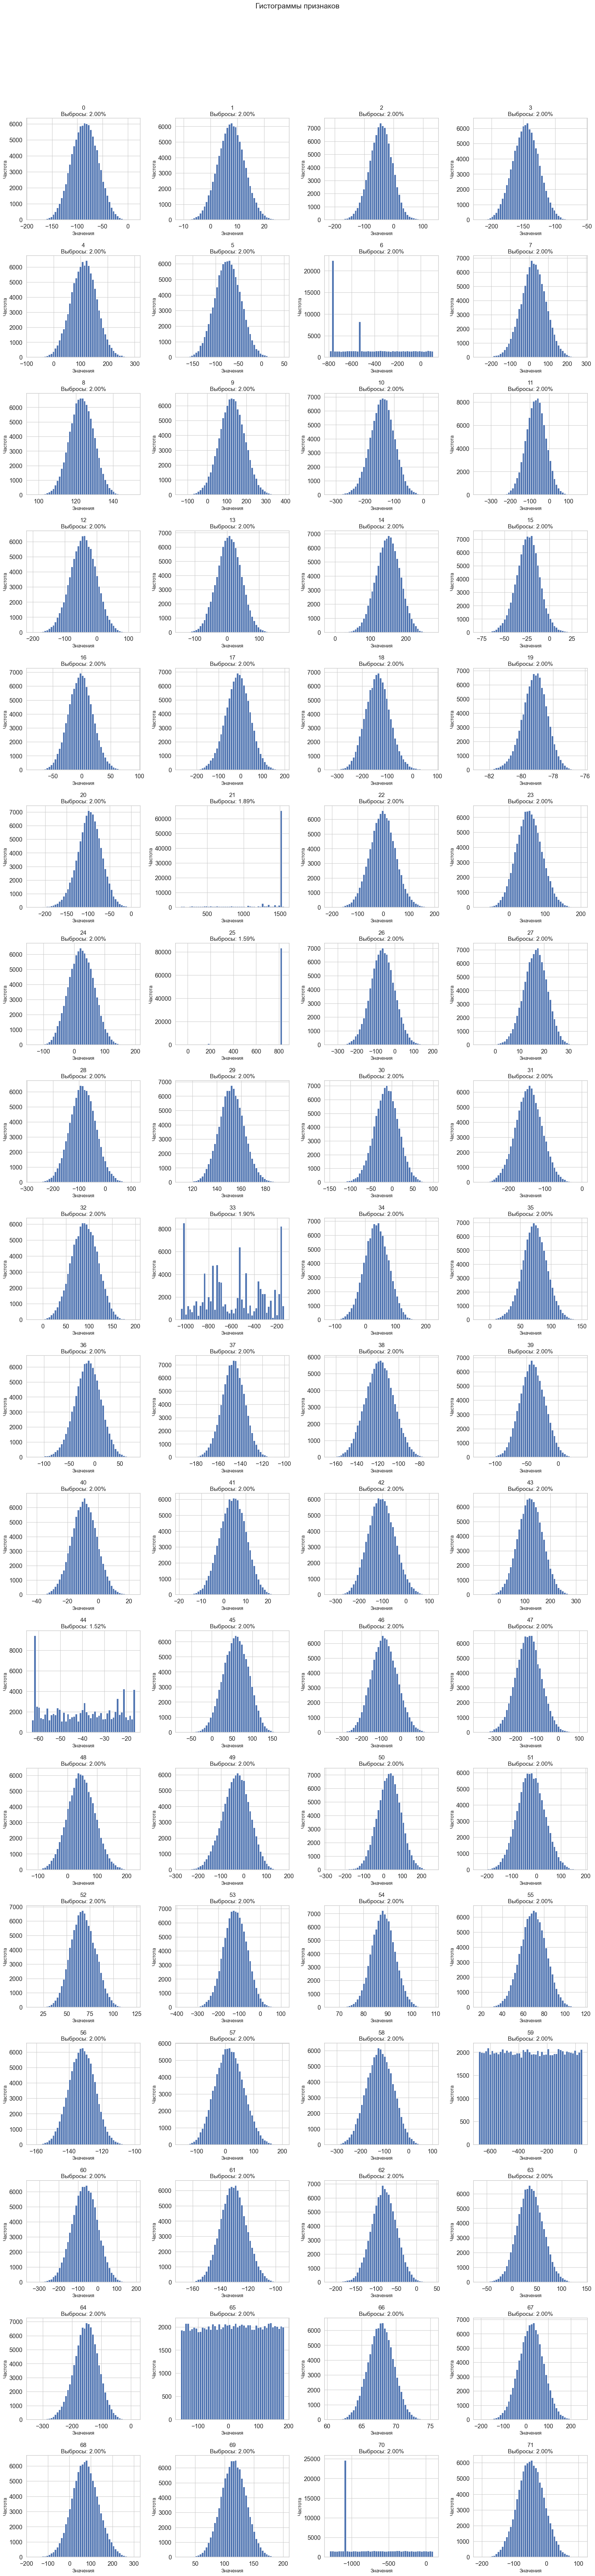

_____________________________________________________________________________________________________________________________

Гистограммы Признаков: df_valid_answer
Нет количественных данных для построения гистограммы.


In [40]:
# Бегло посмотрим на данные
for i in range(len(df)):
    print(LINE_2)
    print(f'\nГистограммы Признаков: {df_names[i]}')
    visualize_histograms(df[i], bins=50, lower_quantile=0.01, upper_quantile=0.99, n_cols=4)

**ВЫВОД:**

В первом разделе проекта были выполнены следующие шаги:

**Общий вывод по загрузке и первичному обзору данных:**
- **Данные успешно загружены и проанализированы**. Все четыре датасета (`df_base`, `df_train`, `df_valid`, `df_valid_answer`) содержат значительное количество строк и столбцов, что указывает на объемный и богатый информацией набор данных.
- **Структура данных**: Датасеты `df_base` и `df_valid` содержат 73 столбца, датасет `df_train` — 74 столбца (дополнительный столбец Target), и датасет `df_valid_answer` — 2 столбца. Все датасеты содержат уникальные идентификаторы в столбце `id`.

**Краткий анализ гистограмм:**
1. **Распределение признаков**:
    - Большинство количественных признаков в датасетах имеют нормальное или близкое к нормальному распределение.
    - Некоторые признаки имеют мультимодальное распределение, что может указывать на наличие нескольких групп или кластеров в данных.


2. **Выбросы**:
    - Выбросы были определены на основе 1% и 99% квантилей. Для каждого признака отображались гистограммы с указанием процента выбросов.
    - Процент выбросов для большинства признаков оказался низким (менее 2-3%), что свидетельствует о высокой однородности данных. Однако, для некоторых признаков процент выбросов был выше, что требует дополнительного анализа и, возможно, очистки данных.


3. **Аномалии**:
    - Были выявлены признаки с аномально высокими выбросами и подозрительными распределениями. Эти признаки требуют более детального анализа, чтобы определить причину аномалий и принять решение о дальнейшем их использовании.


4. **Визуализация данных**:
    - Визуализация гистограмм предоставила ценную информацию о распределении признаков и наличии выбросов. Это поможет в дальнейшей предобработке данных, включая нормализацию и устранение выбросов.

## Раздел. Предобработка данных

### Проверка на пропуски в данных

In [42]:
# Подсчет количества явных дубликатов
for i in range(len(df)):
    print(f'Количество пропусков в {df_names[i]}: {df[i].isna().sum().sum()}')

Количество пропусков в df_base: 0
Количество пропусков в df_train: 0
Количество пропусков в df_valid: 0
Количество пропусков в df_valid_answer: 0


**Вывод:** В данных отсутсвуют пропуски

### Проверка на наличие ошибок и дубликатов в данных

In [43]:
# Подсчет количества явных дубликатов
for i in range(len(df)):
    print(f'Количество явных дубликатов в {df_names[i]}: {df[i].duplicated().sum()}')

Количество явных дубликатов в df_base: 0
Количество явных дубликатов в df_train: 0
Количество явных дубликатов в df_valid: 0
Количество явных дубликатов в df_valid_answer: 0


In [52]:
# Перебираем индексы и объекты DataFrame в списке df с помощью enumerate
for i, dataframe in enumerate(df):
    # Выводим разделительную линию и название DataFrame
    print(f'{line_2}\nУникальные значения для: {df_names[i]}')
    print(f'Общее количество строк: {dataframe.shape[0]}')
    # Перебираем столбцы в текущем DataFrame
    for column in dataframe.columns:
        # Проверяем, является ли тип данных столбца 'object'
        if dataframe[column].dtype == 'object':
            # Получаем уникальные значения столбца, сортируем и выводим
            unique_values = dataframe[column].nunique()
            print(f'Столбец "{column}": {unique_values}')

_____________________________________________________________________________________________________________________________
Уникальные значения для: df_base
Общее количество строк: 2918139
Столбец "Id": 2918139
_____________________________________________________________________________________________________________________________
Уникальные значения для: df_train
Общее количество строк: 100000
Столбец "Id": 100000
Столбец "Target": 91794
_____________________________________________________________________________________________________________________________
Уникальные значения для: df_valid
Общее количество строк: 100000
Столбец "Id": 100000
_____________________________________________________________________________________________________________________________
Уникальные значения для: df_valid_answer
Общее количество строк: 100000
Столбец "Id": 100000
Столбец "Expected": 91502


**Вывод:** Явных дубликатов в данных нету, также в `df_train` и `df_valid_answer` отличаются количества уникальных значчений в запросах и в документах.